In [1]:
import pandas as pd

empDf = pd.read_excel('employee.xlsx')
empDf

,Serial,Emp_ID,Designation,Department,Age,Salary
0,1,1101,Manager,Accounts,50.0,200000.0
1,2,1107,Officer,IT,30.0,80000.0
2,3,1203,Officer,HR,28.0,NaN
3,4,1005,Manager,HR,45.0,120000.0
4,5,2123,Office Boy,Accounts,27.0,45000.0
5,6,2451,Accountant,NaN,34.0,100000.0
6,7,1111,Accountant,Accounts,NaN,110000.0
7,8,1001,Officer,IT,25.0,75000.0
8,9,1234,Manager,IT,23.0,NaN
9,10,2156,Engineer,Production,45.0,89000.0


In [18]:
empDf.isna().sum()

empDf.fillna({'Department': empDf.Department.mode()[0] ,
            'Age': empDf.Age.mean(),
            'Salary': empDf.Salary.mean(),
            } , inplace= True) # to fill the nan values

empDf


,Serial,Emp_ID,Designation,Department,Age,Salary
0,1,1101,Manager,Accounts,50.000000,200000.0
1,2,1107,Officer,IT,30.000000,80000.0
2,3,1203,Officer,HR,28.000000,97000.0
3,4,1005,Manager,HR,45.000000,120000.0
4,5,2123,Office Boy,Accounts,27.000000,45000.0
5,6,2451,Accountant,IT,34.000000,100000.0
6,7,1111,Accountant,Accounts,34.294118,110000.0
7,8,1001,Officer,IT,25.000000,75000.0
8,9,1234,Manager,IT,23.000000,97000.0
9,10,2156,Engineer,Production,45.000000,89000.0


In [61]:
import numpy as np

def outlierRemover(d):
    q1 = np.percentile(d , 25)
    q3 = np.percentile(d , 75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return lower_bound , upper_bound

In [20]:
lf , uf = outlierRemover(empDf.Salary)
print('Lower Bound: ' , lf)
print('Upper Bound: ' , uf)


Lower Bound:  72500.0
Upper Bound:  116500.0


In [ ]:
empDf[(empDf.Salary < lf) | (empDf.Salary > uf)] # gives the outliers

,Serial,Emp_ID,Designation,Department,Age,Salary
0,1,1101,Manager,Accounts,50.0,200000.0
3,4,1005,Manager,HR,45.0,120000.0
4,5,2123,Office Boy,Accounts,27.0,45000.0
11,12,3214,Accountant,Account,49.0,123000.0
17,18,2123,Office Boy,Accounts,27.0,45000.0


In [ ]:
empDfWithoutOutliers = empDf[(empDf['Salary'] >= lf) & (empDf['Salary'] <= uf)]

,Serial,Emp_ID,Designation,Department,Age,Salary


<Axes: ylabel='Age'>

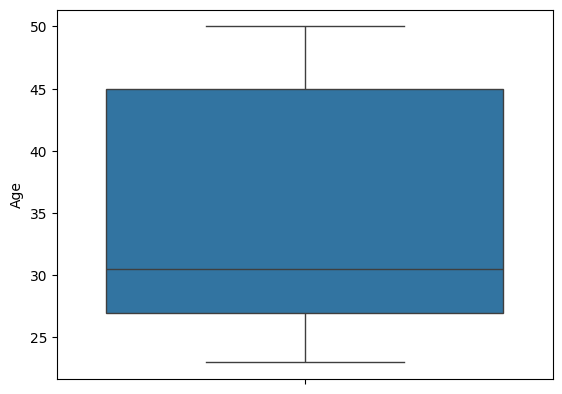

In [39]:
import seaborn as sns

sns.boxplot(empDf.Age)

count        18.000000
mean      97000.000000
std       32927.728347
min       45000.000000
25%       89000.000000
50%       97000.000000
75%      100000.000000
max      200000.000000
Name: Salary, dtype: float64

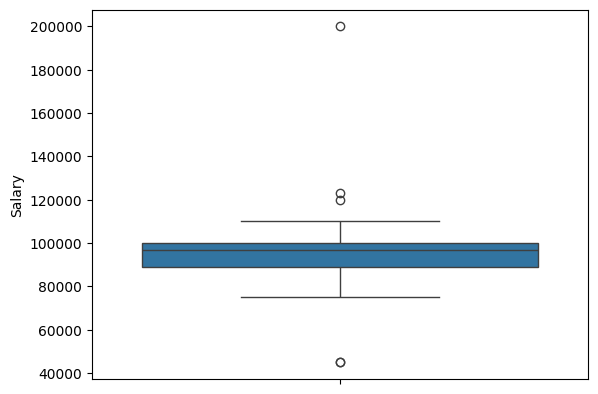

In [40]:
sns.boxplot(empDf.Salary)
empDf.Salary.describe()
# Dots are outliers

count        13.000000
mean      93307.692308
std        9277.074030
min       75000.000000
25%       89000.000000
50%       97000.000000
75%      100000.000000
max      110000.000000
Name: Salary, dtype: float64

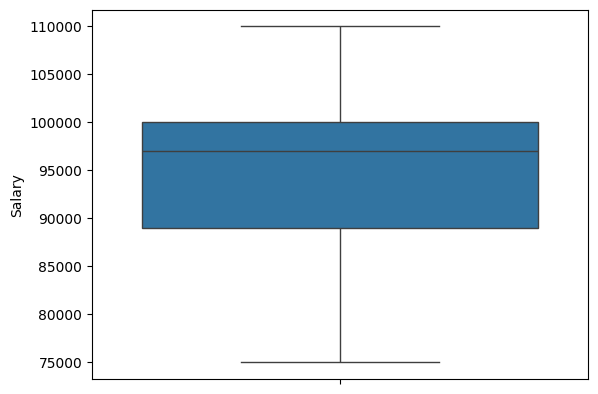

In [41]:
sns.boxplot(empDfWithoutOutliers.Salary)
empDfWithoutOutliers.Salary.describe()

<Axes: xlabel='Designation', ylabel='Salary'>

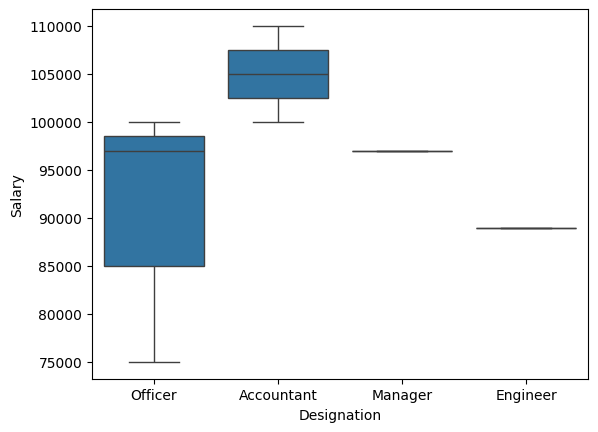

In [43]:
sns.boxplot(data= empDfWithoutOutliers , x = 'Designation' , y = 'Salary')

<Axes: xlabel='Department', ylabel='Age'>

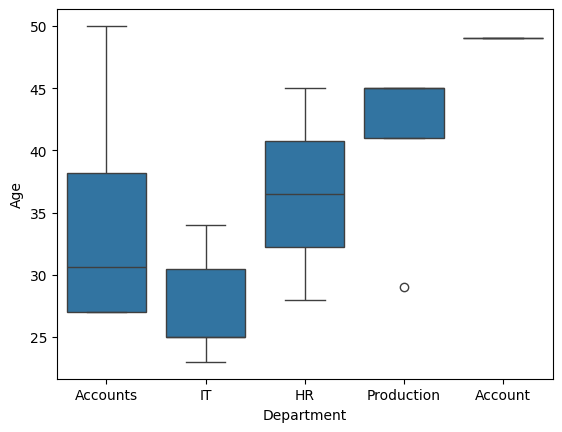

In [50]:
sns.boxplot(data= empDf , x = empDf.Department , y = empDf.Age) # production has maximum no of old Ages people

In [67]:
lfA , ufA = outlierRemover(empDf.Age)
print('Lower Bound: ' , lfA)
print('Upper Bound: ' , ufA)

empDf[(empDf.Age < lf) | (empDf.Age > uf)] # gives the outliers

# Check


Lower Bound:  0.0
Upper Bound:  72.0


,Serial,Emp_ID,Designation,Department,Age,Salary


In [ ]:
empDf[(empDf.Department == 'IT') & (empDf.Age >= 30)]

,Serial,Emp_ID,Designation,Department,Age,Salary
1,2,1107,Officer,IT,30.0,80000.0
5,6,2451,Accountant,IT,34.0,100000.0
14,15,2912,Officer,IT,31.0,90000.0


In [78]:
empDf[(empDf.Age >= 35)]['Age'].count()


np.int64(6)

In [ ]:
empDf[(empDf.Designation) != 'Manager']['Designation'].count()

,Serial,Emp_ID,Designation,Department,Age,Salary
0,1,1101,Manager,Accounts,50.000000,200000.0
1,2,1107,Officer,IT,30.000000,80000.0
2,3,1203,Officer,HR,28.000000,97000.0
3,4,1005,Manager,HR,45.000000,120000.0
4,5,2123,Office Boy,Accounts,27.000000,45000.0
5,6,2451,Accountant,IT,34.000000,100000.0
6,7,1111,Accountant,Accounts,34.294118,110000.0
7,8,1001,Officer,IT,25.000000,75000.0
8,9,1234,Manager,IT,23.000000,97000.0
9,10,2156,Engineer,Production,45.000000,89000.0


In [89]:
empDf[(empDf.Department == 'IT') | (empDf.Department == 'HR')]
empDf[(empDf.Department == 'IT') | (empDf.Department == 'HR')]['Department'].count()


np.int64(9)

In [107]:
empDf.sort_values(by = 'Salary' , ascending= False).head()

,Serial,Emp_ID,Designation,Department,Age,Salary
0,1,1101,Manager,Accounts,50.000000,200000.0
11,12,3214,Accountant,Account,49.000000,123000.0
3,4,1005,Manager,HR,45.000000,120000.0
6,7,1111,Accountant,Accounts,34.294118,110000.0
10,11,6543,Officer,Production,29.000000,100000.0


In [2]:
empDf.groupby('Department')['Salary'].mean() # average salary by department

Department
Account       123000.0
Accounts      100000.0
HR            120000.0
IT             86250.0
Production     91750.0
Name: Salary, dtype: float64

### MY WORK

In [4]:
import pandas as pd

df = pd.read_excel('employee.xlsx')

In [6]:
# Fill NaN Values

df.isna().sum()
df.fillna({'Department' : df.Department.mode()[0] , 
           'Age': df.Age.mean() , 
           'Salary' : df.Salary.mean()
           }, inplace=True)

In [8]:
# Remove Outliers

import numpy as np

def remOutliers(d):
    q1 = np.percentile(d, 25)
    q3 = np.percentile(d, 75)
    iqr = q3 - q1
    lf = q1 - (1.5 * iqr)
    uf = q3 + (1.5 * iqr)
    return lf , uf

<Axes: ylabel='Salary'>

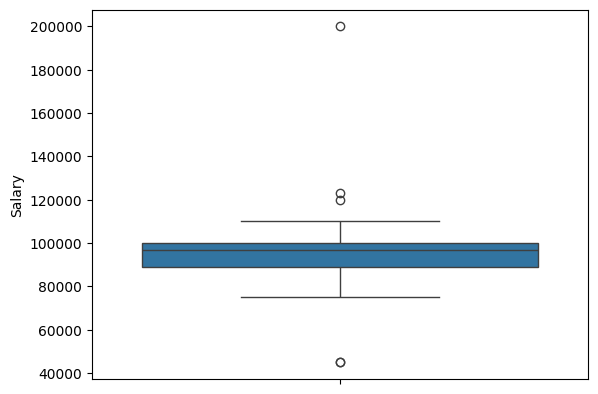

In [10]:
import seaborn as sns

sns.boxplot(df.Salary)

In [12]:
lf , uf = remOutliers(df.Salary)
print('Lower Bound ' , lf)
print('Upper Bound ' , uf)



Lower Bound  72500.0
Upper Bound  116500.0


In [14]:
df[(df.Salary < lf) | (df.Salary > uf)] # Total outliers in Salary

,Serial,Emp_ID,Designation,Department,Age,Salary
0,1,1101,Manager,Accounts,50.0,200000.0
3,4,1005,Manager,HR,45.0,120000.0
4,5,2123,Office Boy,Accounts,27.0,45000.0
11,12,3214,Accountant,Account,49.0,123000.0
17,18,2123,Office Boy,Accounts,27.0,45000.0


In [16]:
dfWoSOutliers = df[(df.Salary >= lf) & (df.Salary <= uf)]
dfWoSOutliers

,Serial,Emp_ID,Designation,Department,Age,Salary
1,2,1107,Officer,IT,30.000000,80000.0
2,3,1203,Officer,HR,28.000000,97000.0
5,6,2451,Accountant,IT,34.000000,100000.0
6,7,1111,Accountant,Accounts,34.294118,110000.0
7,8,1001,Officer,IT,25.000000,75000.0
8,9,1234,Manager,IT,23.000000,97000.0
9,10,2156,Engineer,Production,45.000000,89000.0
10,11,6543,Officer,Production,29.000000,100000.0
12,13,2156,Engineer,Production,45.000000,89000.0
13,14,1098,Officer,IT,25.000000,100000.0


<Axes: ylabel='Salary'>

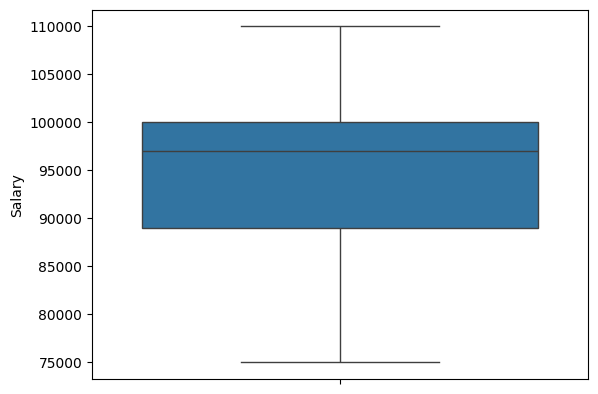

In [18]:
# After Removing the Outliers

sns.boxplot(dfWoSOutliers.Salary)


In [20]:
dfWoSOutliers[(dfWoSOutliers.Department == 'IT') & (dfWoSOutliers.Age < 35)].count()['Department']

dfWoSOutliers[(dfWoSOutliers.Department == 'IT') | (dfWoSOutliers.Department == 'HR')]

,Serial,Emp_ID,Designation,Department,Age,Salary
1,2,1107,Officer,IT,30.0,80000.0
2,3,1203,Officer,HR,28.0,97000.0
5,6,2451,Accountant,IT,34.0,100000.0
7,8,1001,Officer,IT,25.0,75000.0
8,9,1234,Manager,IT,23.0,97000.0
13,14,1098,Officer,IT,25.0,100000.0
14,15,2912,Officer,IT,31.0,90000.0
15,16,1222,Officer,IT,25.0,97000.0


In [22]:
dfWoSOutliers.sort_values(by= 'Salary' , ascending= False) # Sorted by Salary


,Serial,Emp_ID,Designation,Department,Age,Salary
6,7,1111,Accountant,Accounts,34.294118,110000.0
5,6,2451,Accountant,IT,34.000000,100000.0
10,11,6543,Officer,Production,29.000000,100000.0
13,14,1098,Officer,IT,25.000000,100000.0
2,3,1203,Officer,HR,28.000000,97000.0
15,16,1222,Officer,IT,25.000000,97000.0
8,9,1234,Manager,IT,23.000000,97000.0
14,15,2912,Officer,IT,31.000000,90000.0
9,10,2156,Engineer,Production,45.000000,89000.0
12,13,2156,Engineer,Production,45.000000,89000.0


In [24]:
dfWoSOutliers.sort_values(by= 'Salary' , ascending= False).head() # top 5 salaries


,Serial,Emp_ID,Designation,Department,Age,Salary
6,7,1111,Accountant,Accounts,34.294118,110000.0
5,6,2451,Accountant,IT,34.000000,100000.0
10,11,6543,Officer,Production,29.000000,100000.0
13,14,1098,Officer,IT,25.000000,100000.0
2,3,1203,Officer,HR,28.000000,97000.0


In [26]:
dfWoSOutliers.groupby('Department')['Salary'].mean() # Avg Salary of each Department

Department
Accounts      110000.000000
HR             97000.000000
IT             91285.714286
Production     91750.000000
Name: Salary, dtype: float64

<Axes: xlabel='Department', ylabel='Age'>

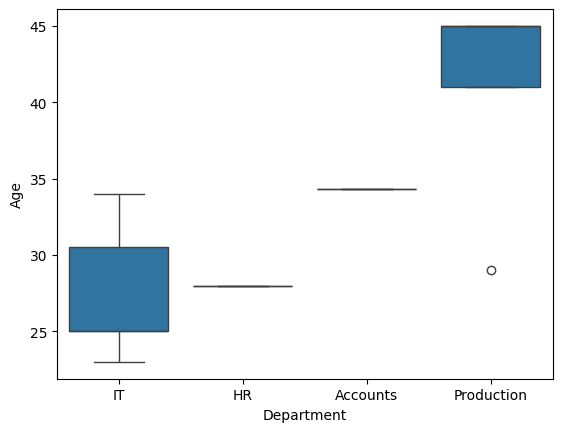

In [28]:
sns.boxplot(data = dfWoSOutliers , x = dfWoSOutliers.Department , y = dfWoSOutliers.Age)

### CLass 9 work


In [134]:
df['Experience_Level'] = df.Age.apply(lambda val: 'Senior' if val >= 40 else 'Junior')
df

,Employee_ID,Designation,Department,Age,Salary,Experience_Level
0,1101,Manager,Accounts,50.000000,200000.0,Senior
1,1107,Officer,IT,30.000000,80000.0,Junior
2,1203,Officer,HR,28.000000,97000.0,Junior
3,1005,Manager,HR,45.000000,120000.0,Senior
4,2123,Office Boy,Accounts,27.000000,45000.0,Junior
5,2451,Accountant,IT,34.000000,100000.0,Junior
6,1111,Accountant,Accounts,34.294118,110000.0,Junior
7,1001,Officer,IT,25.000000,75000.0,Junior
8,1234,Manager,IT,23.000000,97000.0,Junior
9,2156,Engineer,Production,45.000000,89000.0,Senior


In [48]:
# df[(df.Department == 'IT') & (df.Age < 40)]
# OR 
df.query("Department == 'IT' and Age < 40")

,Serial,Emp_ID,Designation,Department,Age,Salary
1,2,1107,Officer,IT,30.0,80000.0
5,6,2451,Accountant,IT,34.0,100000.0
7,8,1001,Officer,IT,25.0,75000.0
8,9,1234,Manager,IT,23.0,97000.0
13,14,1098,Officer,IT,25.0,100000.0
14,15,2912,Officer,IT,31.0,90000.0
15,16,1222,Officer,IT,25.0,97000.0


<Axes: >

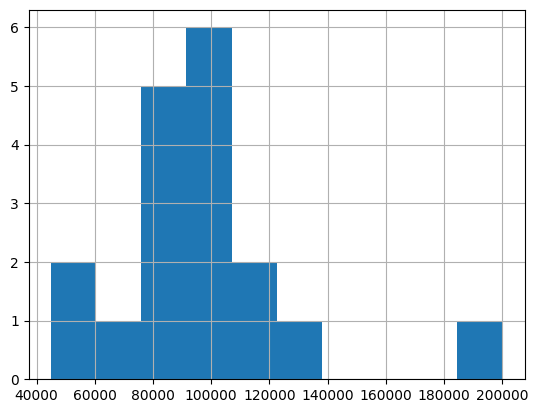

In [50]:
df.Salary.hist() # type of bar chart (builtin method of PYTHON)

In [72]:
df.iloc[:5 , :3] # first five rows and first three columns iloc[rows , columns]

,Serial,Emp_ID,Designation
0,1,1101,Manager
1,2,1107,Officer
2,3,1203,Officer
3,4,1005,Manager
4,5,2123,Office Boy


In [86]:
df.loc[df.Age > 40 , ['Emp_ID' , 'Department' , 'Salary']]
# loc(any condition if you wanna give  , labels instead of index)

,Emp_ID,Department,Salary
0,1101,Accounts,200000.0
3,1005,HR,120000.0
9,2156,Production,89000.0
11,3214,Account,123000.0
12,2156,Production,89000.0
16,2156,Production,89000.0


In [98]:
# df.drop(columns= ['Serial'] , inplace=True) # to Delete the column
df

,Emp_ID,Designation,Department,Age,Salary
0,1101,Manager,Accounts,50.000000,200000.0
1,1107,Officer,IT,30.000000,80000.0
2,1203,Officer,HR,28.000000,97000.0
3,1005,Manager,HR,45.000000,120000.0
4,2123,Office Boy,Accounts,27.000000,45000.0
5,2451,Accountant,IT,34.000000,100000.0
6,1111,Accountant,Accounts,34.294118,110000.0
7,1001,Officer,IT,25.000000,75000.0
8,1234,Manager,IT,23.000000,97000.0
9,2156,Engineer,Production,45.000000,89000.0


In [104]:
# Rename the Column

df = df.rename(columns = {'Emp_ID':'Employee_ID'})
df

,Employee_ID,Designation,Department,Age,Salary
0,1101,Manager,Accounts,50.000000,200000.0
1,1107,Officer,IT,30.000000,80000.0
2,1203,Officer,HR,28.000000,97000.0
3,1005,Manager,HR,45.000000,120000.0
4,2123,Office Boy,Accounts,27.000000,45000.0
5,2451,Accountant,IT,34.000000,100000.0
6,1111,Accountant,Accounts,34.294118,110000.0
7,1001,Officer,IT,25.000000,75000.0
8,1234,Manager,IT,23.000000,97000.0
9,2156,Engineer,Production,45.000000,89000.0


In [120]:
df[df.Designation == 'manager'.capitalize()]

,Employee_ID,Designation,Department,Age,Salary
0,1101,Manager,Accounts,50.0,200000.0
3,1005,Manager,HR,45.0,120000.0
8,1234,Manager,IT,23.0,97000.0


In [127]:
df[df.Department.str.contains('acc' , case = False)] # If Department name contains 'acc'

,Employee_ID,Designation,Department,Age,Salary
0,1101,Manager,Accounts,50.000000,200000.0
4,2123,Office Boy,Accounts,27.000000,45000.0
6,1111,Accountant,Accounts,34.294118,110000.0
11,3214,Accountant,Account,49.000000,123000.0
17,2123,Office Boy,Accounts,27.000000,45000.0


In [132]:
# Find Duplicates

df[df.duplicated()] # find duplicates if there are two then it gives one
# df[df.duplicated(keep=False)] # find duplicates if there are two then it gives both

df.drop_duplicates(inplace=True) # Remove the duplicates


In [ ]:
df['Revised_Salary'] = df.Salary.apply(lambda x : x * 1.10)
# df.Revised_Salary.sum()
# df.Salary.sum()


NameError: name 'df' is not defined

In [135]:
df.to_excel('cleaned_employee_data.xlsx' , index = False)

In [ ]:
# which Department faces the biggest impact